# Template Matching

In [5]:
import sys
sys.path.append("../")

from __init__ import *
from data_tools import *
from testing import *

print(os.getcwd())

/Users/nathan/Documents/GitHub/PowerCutStats/examples


In [47]:
data_sets = []
p_angles = []

with h5py.File("../../../../Desktop/templates/v2/templates_18400eV.h5", "r") as f:
    print(list(f['templates'].keys()))
    
    template_keys = list(f['templates'].keys())
    
    for key in template_keys:
        data_sets.append(np.array(f['templates'][key]))
        p_angles.append(f['templates'][key].attrs['Pitch angle [radians]']/np.pi*180)

['signal1', 'signal10', 'signal100', 'signal1000', 'signal1001', 'signal1002', 'signal1003', 'signal1004', 'signal1005', 'signal1006', 'signal1007', 'signal1008', 'signal1009', 'signal101', 'signal1010', 'signal1011', 'signal1012', 'signal1013', 'signal1014', 'signal1015', 'signal1016', 'signal1017', 'signal1018', 'signal1019', 'signal102', 'signal1020', 'signal1021', 'signal1022', 'signal1023', 'signal1024', 'signal1025', 'signal1026', 'signal1027', 'signal1028', 'signal1029', 'signal103', 'signal1030', 'signal1031', 'signal1032', 'signal1033', 'signal1034', 'signal1035', 'signal1036', 'signal1037', 'signal1038', 'signal1039', 'signal104', 'signal1040', 'signal1041', 'signal1042', 'signal1043', 'signal1044', 'signal1045', 'signal1046', 'signal1047', 'signal1048', 'signal1049', 'signal105', 'signal1050', 'signal1051', 'signal1052', 'signal1053', 'signal1054', 'signal1055', 'signal1056', 'signal1057', 'signal1058', 'signal1059', 'signal106', 'signal1060', 'signal1061', 'signal1062', 'si

### Getting our true simulated data to test MF on

In [34]:
with h5py.File('../../../../Desktop/v2/Harmonic/90.0deg/out_4976c7bd-743b-49a2-99e4-3f13129d44f6.h5', 'r') as f:
    print(list(f.keys()))
    print(list(f['Data']['signal1'].attrs))
    
    data = f['Data']['signal1']
    attributes = dict(data.attrs)
    
    data = np.array(data)
    
true_data = data
true_attributes = attributes

['Data']
['B_bkg [Tesla]', 'Cyclotron frequency [Hertz]', 'Downmixed cyclotron frequency [Hertz]', 'Energy [eV]', 'LO frequency [Hertz]', 'Pitch angle [degrees]', 'Starting position [metres]', 'Starting velocity [metres/second]', 'Time step [seconds]', 'Waveguide impedance [Ohms]', 'i_coil [Amps]', 'r_coil [metres]', 'r_wg [metres]']


In [36]:
len(true_data)

40960

In [51]:
for i in range(1):
    print(data_sets[i].shape)

(10001,)


In [66]:
scores = [] 

# R, Nch, kb, bw, Nsamp, T= 496.1709043911709, 1, 1.38e-23, 1000e6, 10001, 5

R, Nch, kb, bw, Nsamp, T= 496.1709043911709, 1, 1.38e-23, 1000e6, 40960, 5



n_pwr = kb * T * bw # noise power
tau_1t = n_pwr * R # noise variance single channel, time-domain (tau_1t)
tau_1f = tau_1t / Nsamp # noise variance single channel, freq-domain (tau_1f)

for i in range(len(data_sets)):
      
      
        signal_FFT = np.fft.fft(true_data, norm='forward')
        
        # Creating a perfect normalised template
        
        
        extended_data = np.tile(data_sets[i], (40960 // len(data_sets[i])) + 1)[:40960]

        temp_FFT = np.fft.fft(extended_data, norm='forward')
        
        
        
        
        template = np.copy(temp_FFT)
        template /= np.linalg.norm(temp_FFT)
        template /= np.sqrt(tau_1f)
        
        temp_score = np.linalg.norm(signal_FFT) * np.linalg.norm(template)
        
        scores.append(temp_score)

In [67]:
scores

[6.808012545980835,
 6.808012545980833,
 6.808012545980806,
 6.808012545980787,
 6.808012545980831,
 6.80801254598081,
 6.808012545980815,
 6.808012545980792,
 6.80801254598079,
 6.8080125459808265,
 6.808012545980817,
 6.808012545980868,
 6.808012545980844,
 6.808012545980797,
 6.8080125459808345,
 6.8080125459808345,
 6.808012545980814,
 6.808012545980819,
 6.808012545980815,
 6.808012545980803,
 6.808012545980823,
 6.808012545980828,
 6.808012545980828,
 6.808012545980819,
 6.808012545980815,
 6.808012545980812,
 6.808012545980815,
 6.808012545980824,
 6.808012545980877,
 6.808012545980862,
 6.808012545980796,
 6.808012545980815,
 6.808012545980812,
 6.808012545980819,
 6.808012545980814,
 6.808012545980848,
 6.808012545980826,
 6.80801254598084,
 6.808012545980789,
 6.808012545980826,
 6.8080125459808345,
 6.808012545980835,
 6.808012545980821,
 6.808012545980824,
 6.808012545980889,
 6.808012545980805,
 6.808012545980792,
 6.808012545980837,
 6.808012545980821,
 6.808012545980802,

In [ ]:

scores = [] 


R, Nch, kb, bw, Nsamp, T= 496.1709043911709, 1, 1.38e-23, 1000e6, 40960, 5


n_pwr = kb * T * bw # noise power
tau_1t = n_pwr * R # noise variance single channel, time-domain (tau_1t)
tau_1f = tau_1t / Nsamp # noise variance single channel, freq-domain (tau_1f)

for i in range(len(data_sets)):
      
      
        signal_FFT = np.fft.fft(data_sets[i], norm='forward')
        
        # Creating a perfect normalised template
        
        template = np.copy(signal_FFT)
        template /= np.linalg.norm(signal_FFT)
        template /= np.sqrt(tau_1f)
        
        temp_score = np.linalg.norm(signal_FFT) * np.linalg.norm(template)
        
        scores.append(temp_score)

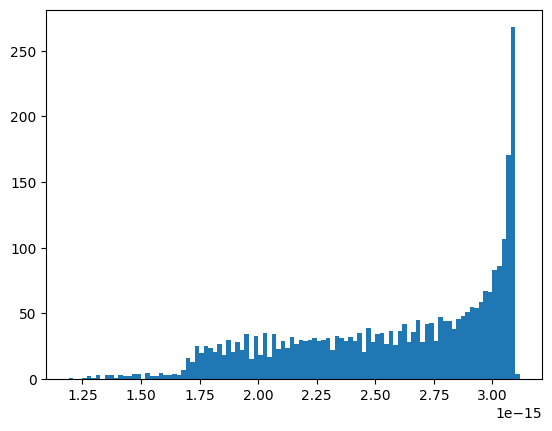

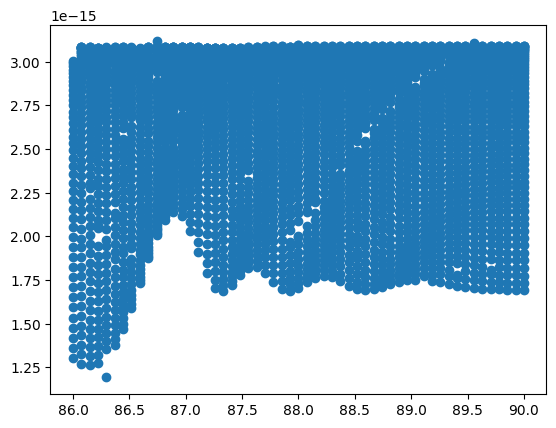

In [65]:
plt.hist(scores, bins=100)

plt.show()



plt.plot(p_angles, scores, 'o')